In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
os.chdir(os.path.dirname(os.getcwd()))

In [5]:
df = pd.read_csv("data/raw/googleplaystore.csv", index_col=0)

# Limpieza duplicados y Rating

In [6]:
df.loc[df["Reviews"]==0,"Rating"]=0.0

In [7]:
df.sort_values(by="App", inplace=True)
df.reset_index(inplace=True,drop=True)

In [8]:
for i in range(0,len(df)):
    if i==0:
        continue
    if df.loc[i,"App"]==df.loc[(i-1),"App"] and df.loc[i,"Category"]==df.loc[(i-1),"Category"]:
        df.loc[i,"duplicado"]=1
    else:
        df.loc[i,"duplicado"]=0

In [9]:
df.drop(df[df["duplicado"]==1].index,axis=0, inplace=True)

In [10]:
df.drop("duplicado",axis=1,inplace=True)

In [11]:
df.drop(df[df["Rating"].isna()].index,axis=0, inplace=True)

In [12]:
df["Rating"] = np.where(df["Rating"].str.contains(","),df["Rating"].str.replace(",","."),df["Rating"])
df.loc[df["Rating"].isna(),"Rating"]=0
df["Rating"]=df["Rating"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8888 entries, 1 to 10830
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8888 non-null   object 
 1   Category        8888 non-null   object 
 2   Rating          8888 non-null   float64
 3   Reviews         8888 non-null   float64
 4   Size            8888 non-null   object 
 5   Installs        8888 non-null   object 
 6   Type            8888 non-null   object 
 7   Price           8888 non-null   object 
 8   Content Rating  8888 non-null   object 
 9   Genres          8888 non-null   object 
 10  Last Updated    8888 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8888 non-null   object 
dtypes: float64(2), object(11)
memory usage: 972.1+ KB


In [13]:
df.reset_index(drop=True,inplace=True)

# Limpieza Installs, variable objetivo, generamos nueva variable objetivo categórica

In [14]:
df["Installs"]=df["Installs"].str.replace(",","")
df["Installs"]=df["Installs"].str.replace("+","")
df["Installs"]=df["Installs"].astype(int)

(array([  74.,  357.,  557.,  929., 1417., 1556., 1936., 1584.,  429.,
          49.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

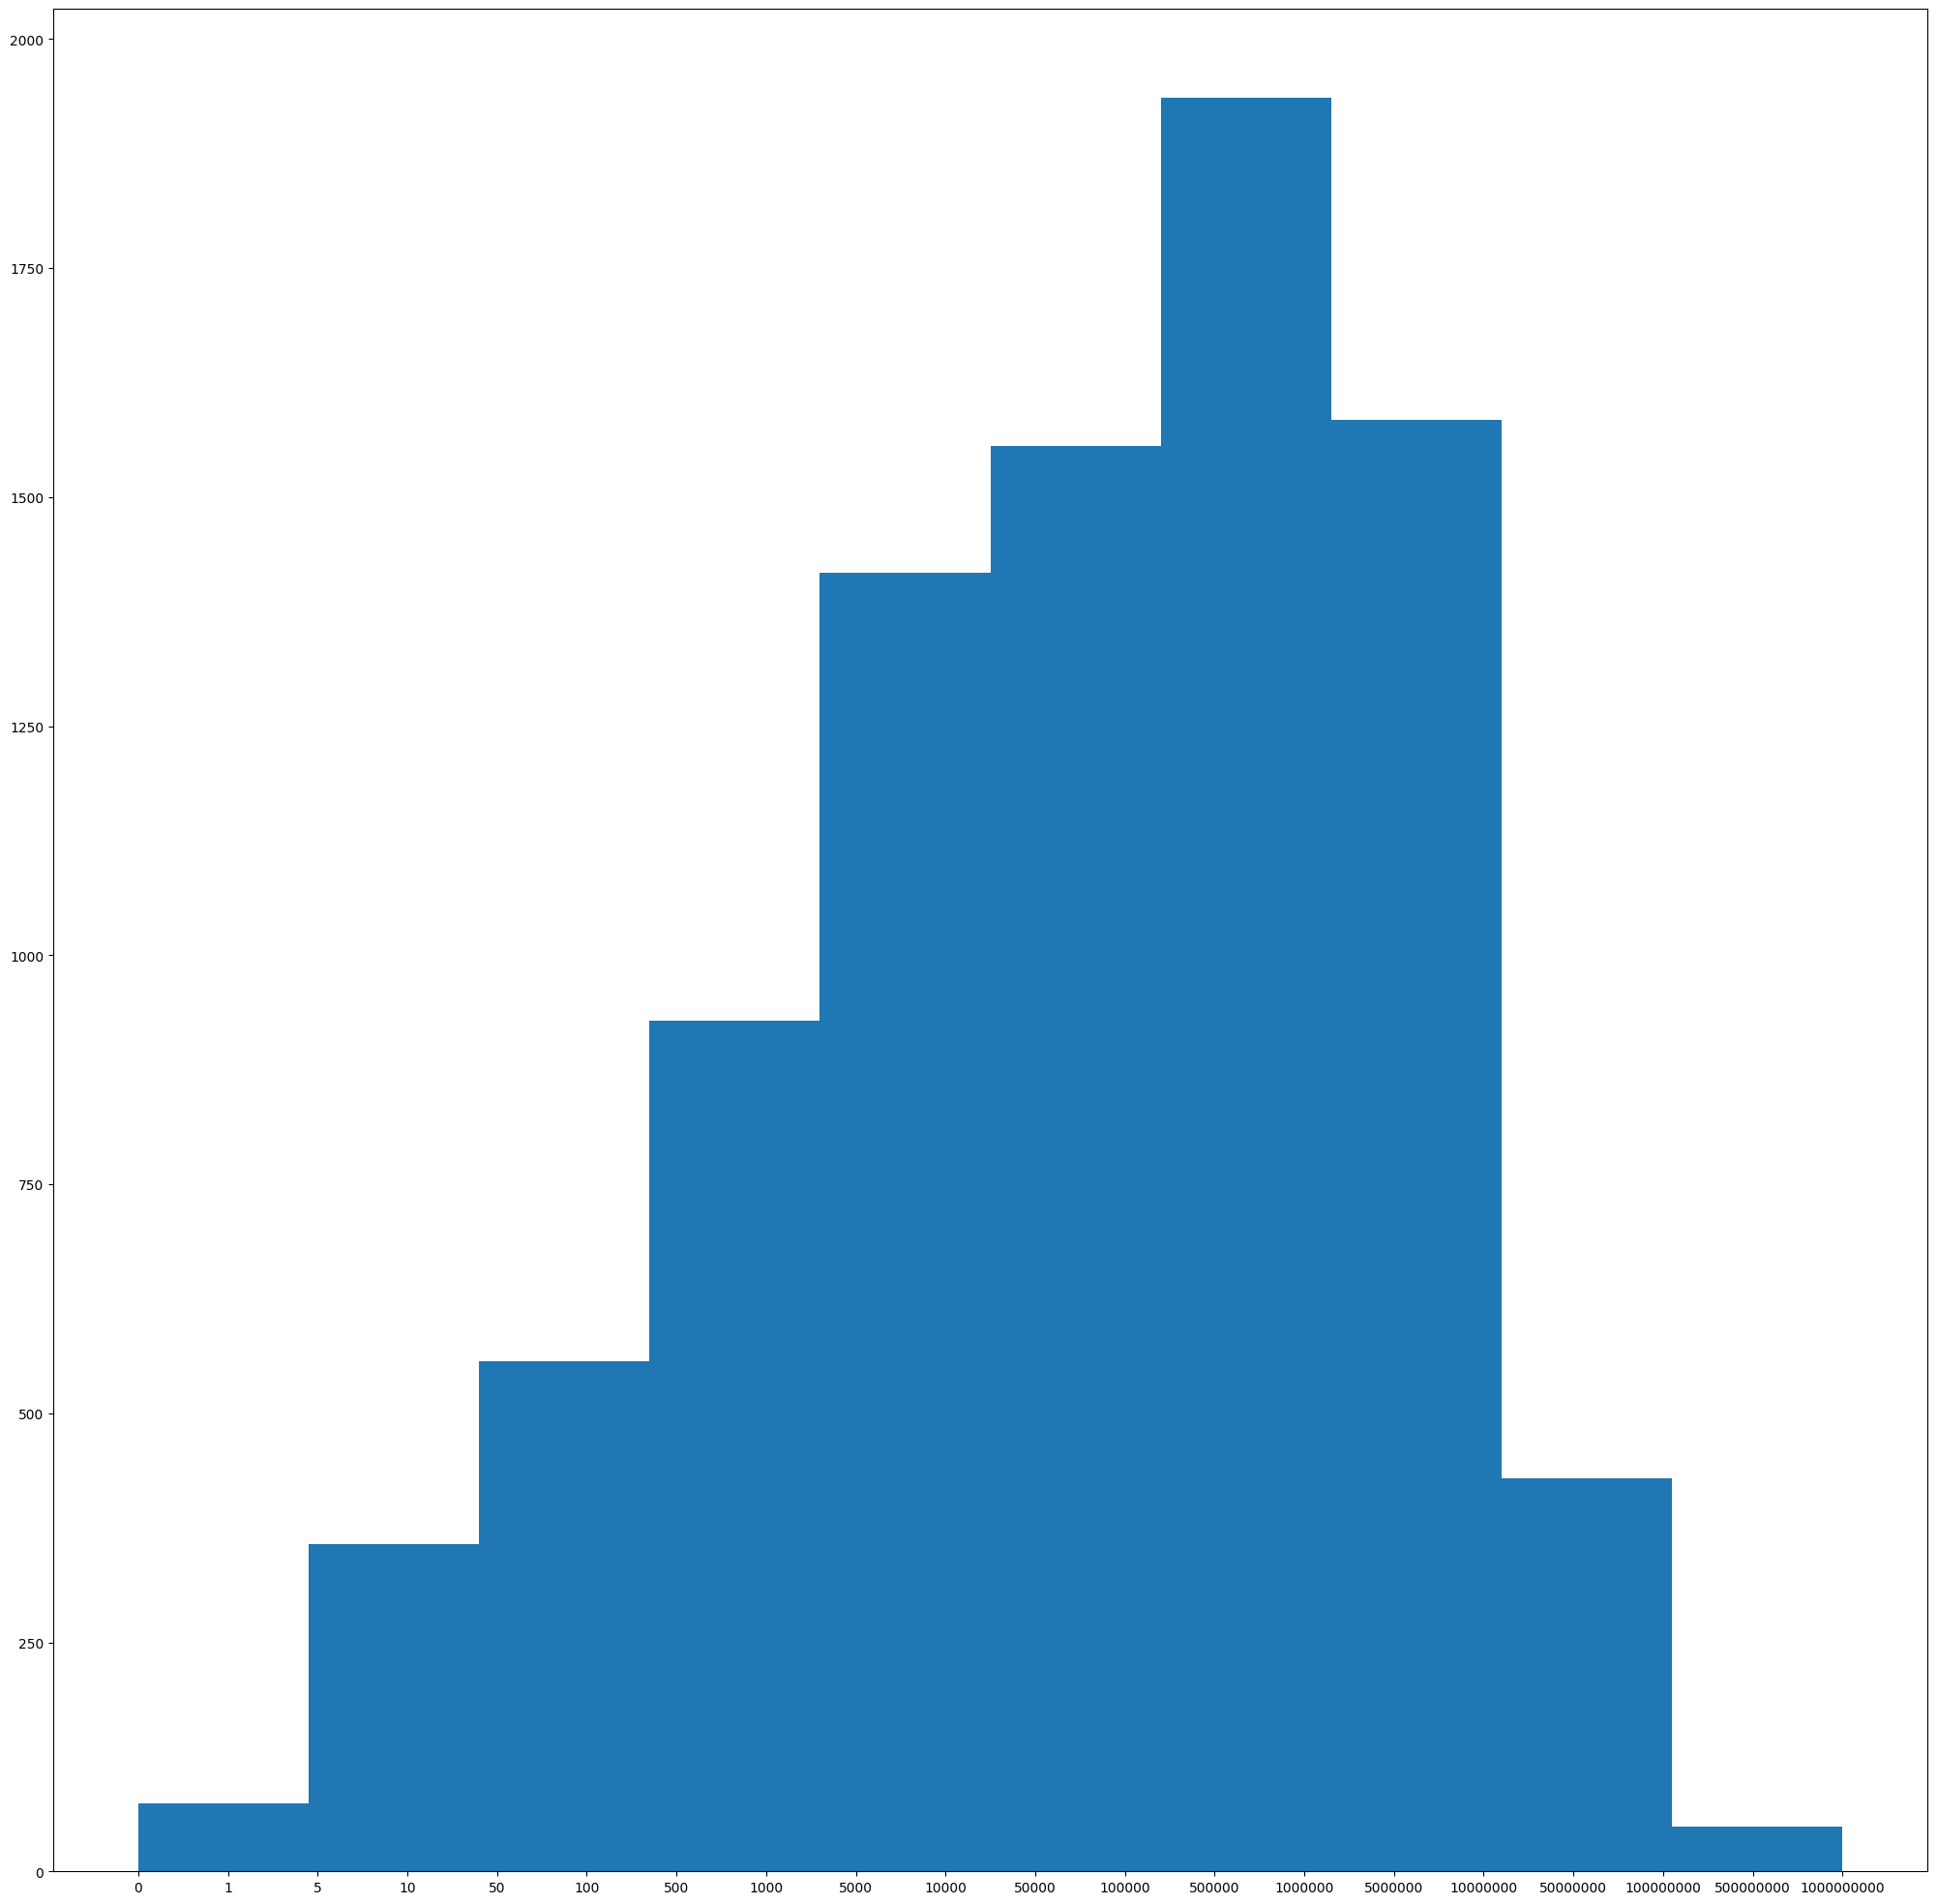

In [15]:
plt.figure(figsize=(25,25))
plt.hist(df[["Installs"]].sort_values(by="Installs").astype(str))

In [16]:
for i,j in enumerate(list(df["Installs"].sort_values().unique())):
    df.loc[df["Installs"]==j, "Descargas"] = i

In [17]:
df.loc[df["Installs"]>=0,"Descargas2"]=0
df.loc[df["Installs"]>=1000,"Descargas2"]=1
df.loc[df["Installs"]>=10000,"Descargas2"]=2
df.loc[df["Installs"]>=100000,"Descargas2"]=3
df.loc[df["Installs"]>=1000000,"Descargas2"]=4
df.loc[df["Installs"]>=10000000,"Descargas2"]=5
df["Descargas2"].value_counts()

Descargas2
4.0    2050
3.0    1605
2.0    1449
5.0    1440
0.0    1209
1.0    1135
Name: count, dtype: int64

# Categoría, ordenada en función de la media con descargas

In [18]:
for i,j in enumerate(list(df.groupby("Category")["Descargas2"].mean().sort_values().index)):
    df.loc[df["Category"]==j,"Categoria"]=i

In [20]:
df.groupby("Category")["Descargas2"].mean().sort_values()

Category
MEDICAL                1.360795
EVENTS                 1.666667
BUSINESS               1.677419
LIFESTYLE              2.155689
DATING                 2.183007
LIBRARIES_AND_DEMO     2.369231
BOOKS_AND_REFERENCE    2.371728
PERSONALIZATION        2.394495
FINANCE                2.422713
AUTO_AND_VEHICLES      2.467532
BEAUTY                 2.477273
NEWS_AND_MAGAZINES     2.609091
FAMILY                 2.630262
TOOLS                  2.641732
ART_AND_DESIGN         2.677419
PRODUCTIVITY           2.702941
COMICS                 2.759259
HEALTH_AND_FITNESS     2.776119
MAPS_AND_NAVIGATION    2.795082
PARENTING              2.820000
SPORTS                 2.824561
COMMUNICATION          2.881119
TRAVEL_AND_LOCAL       2.885572
SOCIAL                 2.944186
FOOD_AND_DRINK         3.038835
HOUSE_AND_HOME         3.119403
VIDEO_PLAYERS          3.274510
SHOPPING               3.376344
WEATHER                3.466667
PHOTOGRAPHY            3.563433
GAME                   3.577825

# Tamaño del archivo

In [21]:
df["tamaño"] = np.where(df["Size"].str.contains("k"), df["Size"].str.replace("k",""), np.where(df["Size"].str.contains("M"), df["Size"].str.replace("M",""), np.where(df["Size"].str.contains("Varies with device"), df["Size"].str.replace("Varies with device","0"), df["Size"])) )
df["tamaño"]=df[["tamaño"]].astype(float)
df["tamaño"]=np.where(df["Size"].str.contains("M"),df["tamaño"]*1000,df["tamaño"] )

In [22]:
df.corr(numeric_only=True)

,Rating,Reviews,Installs,Descargas,Descargas2,Categoria,tamaño
Rating,1.000000,0.058846,0.057409,0.501168,0.428890,0.138713,0.076588
Reviews,0.058846,1.000000,0.602425,0.221950,0.176930,0.090728,0.074703
Installs,0.057409,0.602425,1.000000,0.277133,0.212514,0.087556,0.001531
Descargas,0.501168,0.221950,0.277133,1.000000,0.975111,0.320366,0.160586
Descargas2,0.428890,0.176930,0.212514,0.975111,1.000000,0.324754,0.164124
Categoria,0.138713,0.090728,0.087556,0.320366,0.324754,1.000000,0.157856
tamaño,0.076588,0.074703,0.001531,0.160586,0.164124,0.157856,1.000000


#### Apenas hay correlación, vamos a agrupar las apps por su tamaño en  grupos y para los que no conocemos el tamaño le pondremos , despues reasignaremos el orden de los grupos en función de la media de descargas

In [26]:
df.loc[df["tamaño"]==0, "tamaño2"]=0
df.loc[df["tamaño"]>0, "tamaño2"]=1
df.loc[df["tamaño"]>3500, "tamaño2"]=2
df.loc[df["tamaño"]>7000, "tamaño2"]=3
df.loc[df["tamaño"]>13000, "tamaño2"]=4
df.loc[df["tamaño"]>25000, "tamaño2"]=5
df.loc[df["tamaño"]>45000, "tamaño2"]=6
df.groupby("tamaño2")["Descargas2"].mean().sort_values()

tamaño2
1.0    1.819926
2.0    2.150988
3.0    2.382669
4.0    2.709951
5.0    2.779951
6.0    3.515152
0.0    3.960195
Name: Descargas2, dtype: float64

In [27]:
df.loc[df["tamaño2"]==1, "tamaño2"]=0
df.loc[df["tamaño2"]==2, "tamaño2"]=1
df.loc[df["tamaño2"]==3, "tamaño2"]=2
df.loc[df["tamaño2"]==4, "tamaño2"]=3
df.loc[df["tamaño2"]==5, "tamaño2"]=4
df.loc[df["tamaño2"]==6, "tamaño2"]=5
df.loc[df["tamaño2"]==0, "tamaño2"]=6

In [28]:
df["tamaño2"].value_counts()

tamaño2
6.0    2586
3.0    1417
2.0    1304
1.0    1265
4.0    1227
5.0    1089
Name: count, dtype: int64

# Type y Price, es prácticamente la misma variable

In [29]:
df.loc[df["Type"]=="Free","Gratuito"]=1
df.loc[df["Type"]=="Paid","Gratuito"]=0

In [30]:
df["Price"]=df["Price"].str.replace("$","").copy()
df["Price"]=df["Price"].astype(float).copy()

# Tipo de contenido (EDAD/PUBLICO)

In [31]:
for i,j in enumerate(list(df.groupby("Content Rating")["Descargas2"].mean().sort_values().index)):
    df.loc[df["Content Rating"]==j,"tipo_contenido"]=i

In [32]:
df["tipo_contenido"].value_counts()

tipo_contenido
1.0    7187
3.0     983
2.0     374
5.0     340
4.0       3
0.0       1
Name: count, dtype: int64

# Género de la aplicación

In [33]:
for i,j in enumerate(list(range(0,len(df)))):
    df.loc[i,"Genero1"] = df.loc[i,"Genres"].split(";")[0]

df.loc[df["Genero1"]=="Music & Audio","Genero1"]="Music"




In [34]:
for i,j in enumerate(list(df.groupby("Genero1")["Descargas2"].mean().sort_values().index)):
    df.loc[df["Genero1"]==j,"Genero1"]=i

In [35]:
df.groupby("Genero1")["Descargas2"].mean()

Genero1
0     1.360795
1     1.666667
2     1.677419
3     2.089580
4     2.158209
5     2.183007
6     2.362694
7     2.366667
8     2.369231
9     2.394495
10    2.422713
11    2.467532
12    2.477273
13    2.603448
14    2.609091
15    2.641732
16    2.692308
17    2.695100
18    2.702941
19    2.759259
20    2.781481
21    2.795082
22    2.820000
23    2.871186
24    2.881533
25    2.885572
26    2.944186
27    2.968750
28    3.038835
29    3.063830
30    3.119403
31    3.157895
32    3.264368
33    3.294872
34    3.301435
35    3.366412
36    3.376068
37    3.376344
38    3.447826
39    3.466667
40    3.500000
41    3.500000
42    3.505208
43    3.563433
44    3.674194
45    3.688679
46    3.913462
Name: Descargas2, dtype: float64

In [157]:
#for i,j in enumerate(list(df.groupby("Genero1")["Installs"].mean().sort_values().values)):
#    df.loc[df["Genero1"]==i,"Genero2"]=j

# Última actualización

In [36]:
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jan"), df["Last Updated"].str.replace("Jan","01"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Feb"), df["Last Updated"].str.replace("Feb","02"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Mar"), df["Last Updated"].str.replace("Mar","03"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Apr"), df["Last Updated"].str.replace("Apr","04"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("May"), df["Last Updated"].str.replace("May","05"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jun"), df["Last Updated"].str.replace("Jun","06"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jul"), df["Last Updated"].str.replace("Jul","07"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Aug"), df["Last Updated"].str.replace("Aug","08"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Sep"), df["Last Updated"].str.replace("Sep","09"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Oct"), df["Last Updated"].str.replace("Oct","10"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Nov"), df["Last Updated"].str.replace("Nov","11"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Dec"), df["Last Updated"].str.replace("Dec","12"), df["Last Updated"])

In [37]:
for i,j in enumerate(list(range(0,len(df)))):
    df.loc[i,"Last Updated"] = "20" + df.loc[i,"Last Updated"].split("-")[2] + "-" + df.loc[i,"Last Updated"].split("-")[1] + "-" + df.loc[i,"Last Updated"].split("-")[0]

In [38]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

fecha_actual = datetime.now()

df['dias_sin_actualizar'] = (fecha_actual - df['Last Updated']).dt.days

In [39]:
df["dias_sin_actualizar"].describe()

count    8888.000000
mean     2351.458708
std       405.021980
min      2080.000000
25%      2101.000000
50%      2162.000000
75%      2425.000000
max      5081.000000
Name: dias_sin_actualizar, dtype: float64

In [40]:
df["meses_sin_actualizar"] = round(df["dias_sin_actualizar"] / 30 ,0)

In [41]:
len(df["meses_sin_actualizar"].unique())

87

In [42]:
media_ins_mes = pd.DataFrame(df.groupby("meses_sin_actualizar")["Descargas2"].mean().sort_values()).reset_index().sort_values(by="meses_sin_actualizar").reset_index(drop=True)

In [43]:
mes_count = pd.DataFrame(df["meses_sin_actualizar"].value_counts().reset_index())

In [44]:
media_ins_mes

,meses_sin_actualizar,Descargas2
0,69.0,3.661818
1,70.0,3.363506
2,71.0,2.930032
3,72.0,2.714739
4,73.0,2.376771
...,...,...
82,156.0,2.500000
83,158.0,1.333333
84,159.0,3.500000
85,161.0,2.000000


In [45]:
pd.merge(media_ins_mes,mes_count,on="meses_sin_actualizar",how="left").to_csv("prueba.csv")

In [168]:
pd.DataFrame(df["meses_sin_actualizar"].value_counts()).sort_index().to_csv("prueba.csv")

# Revisar como agrupar los meses con una distribución normal

In [47]:
for i,j in enumerate(list(media_ins_mes["meses_sin_actualizar"])):
    if media_ins_mes.loc[i,"Descargas2"]>=0:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=0
    if media_ins_mes.loc[i,"Descargas2"]>=2:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=1
    if media_ins_mes.loc[i,"Descargas2"]>=2.2:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=2
    if media_ins_mes.loc[i,"Descargas2"]>=2.4:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=3
    if media_ins_mes.loc[i,"Descargas2"]>=2.6:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=4
    if media_ins_mes.loc[i,"Descargas2"]>=3:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=5


# Versión actual

In [50]:
len(df["Current Ver"].unique())

2664

In [51]:
df["version_actual"] = df["Current Ver"].str[0:2]

In [52]:
df["version_actual"] = df["version_actual"].str.replace(",","")
df["version_actual"] = df["version_actual"].str.replace(".","")
df["version_actual"] = df["version_actual"].str.replace("v","")
df["version_actual"] = df["version_actual"].str.replace("_","")
df["version_actual"] = df["version_actual"].str.replace("/","")
df["version_actual"] = df["version_actual"].str.replace("r","")

In [53]:
mask = df['version_actual'].str.contains(r'[a-zA-Z]', regex=True)
df.loc[mask, 'version_actual'] = '100'

In [54]:
df["version_actual"]=df["version_actual"].astype(int)
df["version_actual"].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  50,  52,  53,  54,  56,
        57,  58,  60,  65,  67,  68,  69,  70,  71,  79,  81,  85,  99,
       100])

In [55]:
df.groupby("version_actual")["Descargas2"].mean()

version_actual
0      1.851852
1      2.168424
2      2.747931
3      2.924577
4      3.209830
         ...   
79     5.000000
81     3.000000
85     2.000000
99     4.000000
100    3.852373
Name: Descargas2, Length: 66, dtype: float64

In [57]:
media_ins_act = pd.DataFrame(df.groupby("version_actual")["Descargas2"].mean().sort_values()).reset_index().sort_values(by="Descargas2").reset_index(drop=True)

In [58]:
version_count = pd.DataFrame(df["version_actual"].value_counts().reset_index())

In [59]:
pd.merge(media_ins_act,version_count,on="version_actual",how="left").to_csv("prueba.csv")

In [61]:
for i,j in enumerate(list(media_ins_act["version_actual"])):
    if media_ins_act.loc[i,"Descargas2"]>=0:
        df.loc[df["version_actual"]==j,"grupoversiones"]=0
    if media_ins_act.loc[i,"Descargas2"]>=2.2:
        df.loc[df["version_actual"]==j,"grupoversiones"]=1
    if media_ins_act.loc[i,"Descargas2"]>=3:
        df.loc[df["version_actual"]==j,"grupoversiones"]=2

In [63]:
pd.DataFrame(df.groupby("grupoversiones")["Descargas2"].mean()).reset_index()

,grupoversiones,Descargas2
0,0.0,2.138126
1,1.0,2.815170
2,2.0,3.505743


In [182]:
#for i in list(pd.DataFrame(df.groupby("grupoversiones")["Installs"].mean()).index):
#    df.loc[df["grupoversiones"]==i, "media_inst_grp_ver"] = round(pd.DataFrame(df.groupby("grupoversiones")["Installs"].mean()).iloc[int(i),:].values[0],0)
#df["media_inst_grp_ver"]=df["media_inst_grp_ver"].astype(int)

In [183]:
#for i in list(pd.DataFrame(df.groupby("grupoversiones")["Installs"].median()).index):
#    df.loc[df["grupoversiones"]==i, "mediana_inst_grp_ver"] = round(pd.DataFrame(df.groupby("grupoversiones")["Installs"].median()).iloc[int(i),:].values[0],0)
#df["mediana_inst_grp_ver"]=df["mediana_inst_grp_ver"].astype(int)

# Versión Android

In [64]:
for i,j in enumerate(list(df["Android Ver"].unique())):
    df.loc[df["Android Ver"]==j,"version_android"] = i

In [65]:
df.loc[df["version_android"]>=14,"version_android"]=14
df.loc[df["version_android"]==2,"version_android"]=3

In [66]:
version = pd.DataFrame(df.groupby("version_android")["Descargas2"].mean().sort_values().reset_index()).reset_index()

In [67]:
version

,index,version_android,Descargas2
0,0,10.0,1.760417
1,1,6.0,1.976526
2,2,14.0,2.182039
3,3,13.0,2.452261
4,4,7.0,2.462810
5,5,5.0,2.512500
6,6,8.0,2.527434
7,7,9.0,2.531051
8,8,3.0,2.604457
9,9,1.0,2.680705


In [68]:
df["version_android"] = pd.merge(df,version, on=["version_android"],how="left")["index"]

In [69]:
df["version_android"].value_counts()

version_android
9     2042
7     1256
6     1130
13     997
11     773
12     572
10     478
2      412
8      359
5      240
1      213
3      199
4      121
0       96
Name: count, dtype: int64

In [190]:
#df['med_versandroid'] = df.groupby("version_android")["Installs"].transform('mean').round()

In [71]:
df.corr(numeric_only=True)

,Rating,Reviews,Installs,Price,Descargas,Descargas2,Categoria,tamaño,tamaño2,Gratuito,tipo_contenido,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
Rating,1.000000,0.058846,0.057409,-0.030092,0.501168,0.428890,0.138713,0.076588,0.054005,0.028056,0.057454,-0.044191,-0.043206,0.114625,0.058955,0.123016,0.052883
Reviews,0.058846,1.000000,0.602425,-0.008400,0.221950,0.176930,0.090728,0.074703,0.091470,0.036377,0.094462,-0.071304,-0.070556,0.107677,0.107423,0.095552,0.076766
Installs,0.057409,0.602425,1.000000,-0.010244,0.277133,0.212514,0.087556,0.001531,0.110580,0.045126,0.053245,-0.082569,-0.081857,0.124044,0.179408,0.128903,0.117346
Price,-0.030092,-0.008400,-0.010244,1.000000,-0.065674,-0.059310,-0.048921,-0.017185,0.007653,-0.225613,-0.015166,0.001559,0.001478,-0.022321,-0.013701,-0.031007,-0.021120
Descargas,0.501168,0.221950,0.277133,-0.065674,1.000000,0.975111,0.320366,0.160586,0.173571,0.252940,0.147463,-0.191187,-0.189207,0.314212,0.274218,0.355253,0.220637
Descargas2,0.428890,0.176930,0.212514,-0.059310,0.975111,1.000000,0.324754,0.164124,0.171716,0.250532,0.148447,-0.205905,-0.203850,0.329780,0.272954,0.353689,0.227362
Categoria,0.138713,0.090728,0.087556,-0.048921,0.320366,0.324754,1.000000,0.157856,0.089161,0.055536,0.167937,-0.034533,-0.033938,0.090914,0.069962,0.060491,0.096513
tamaño,0.076588,0.074703,0.001531,-0.017185,0.160586,0.164124,0.157856,1.000000,0.099019,0.012655,0.206681,-0.153927,-0.153235,0.123226,-0.267668,-0.112447,-0.022811
tamaño2,0.054005,0.091470,0.110580,0.007653,0.173571,0.171716,0.089161,0.099019,1.000000,-0.038596,0.043012,0.064032,0.065040,0.030691,0.384847,0.159135,0.158926
Gratuito,0.028056,0.036377,0.045126,-0.225613,0.252940,0.250532,0.055536,0.012655,-0.038596,1.000000,0.021693,-0.170394,-0.170353,0.121939,0.022989,0.073999,0.096483


<Axes: >

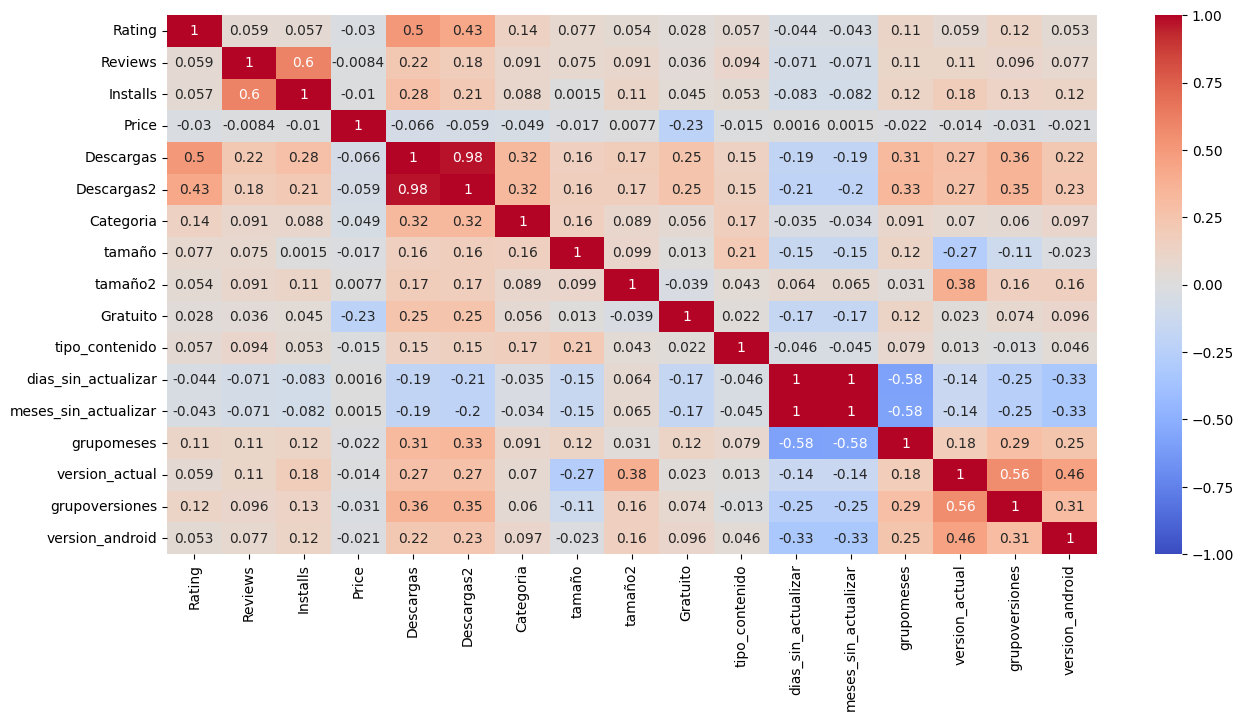

In [72]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, annot=True, cmap="coolwarm")

In [193]:
#sns.heatmap(df[["Installs","Categoria","tamaño2", "Genero2", "grupomeses", "grupoversiones", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [73]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,tamaño2,Gratuito,tipo_contenido,Genero1,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
0,#NAME?,COMICS,3.5,115.0,9.1M,10000,Free,0.00,Mature 17+,Comics,...,2.0,1.0,2.0,19,2106,70.0,5.0,5,2.0,10
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,1.0,26,2086,70.0,5.0,5,2.0,9
2,.R,TOOLS,4.5,259.0,203k,10000,Free,0.00,Everyone,Tools,...,6.0,1.0,1.0,15,3502,117.0,2.0,1,0.0,8
3,/u/app,COMMUNICATION,4.7,573.0,53M,10000,Free,0.00,Mature 17+,Communication,...,5.0,1.0,2.0,24,2116,71.0,4.0,4,2.0,9
4,058.ba,NEWS_AND_MAGAZINES,4.4,27.0,14M,100,Free,0.00,Everyone,News & Magazines,...,3.0,1.0,1.0,14,2113,70.0,5.0,1,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,감성학원 BL 첫사랑,COMICS,4.4,190.0,34M,10000,Free,0.00,Everyone,Comics,...,4.0,1.0,1.0,19,2344,78.0,2.0,3,1.0,2
8884,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000,Paid,399.99,Everyone,Lifestyle,...,4.0,0.0,1.0,4,2230,74.0,1.0,1,0.0,11
8885,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,1.0,26,2095,70.0,5.0,4,2.0,7
8886,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3.2M,10000,Free,0.00,Everyone,Tools,...,6.0,1.0,1.0,15,2371,79.0,2.0,1,0.0,8


In [74]:
df.to_csv("data/processed.csv",index=False)

In [197]:
#sns.heatmap(df[["Descargas","Categoria","tamaño","tamaño2","Gratuito", "Genero1","Genero2", "grupomeses", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   8888 non-null   object        
 1   Category              8888 non-null   object        
 2   Rating                8888 non-null   float64       
 3   Reviews               8888 non-null   float64       
 4   Size                  8888 non-null   object        
 5   Installs              8888 non-null   int32         
 6   Type                  8888 non-null   object        
 7   Price                 8888 non-null   float64       
 8   Content Rating        8888 non-null   object        
 9   Genres                8888 non-null   object        
 10  Last Updated          8888 non-null   datetime64[ns]
 11  Current Ver           8888 non-null   object        
 12  Android Ver           8888 non-null   object        
 13  Descargas         

In [76]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Descargas,Descargas2,Categoria,tamaño,tamaño2,Gratuito,tipo_contenido,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
count,8888.000000,8.888000e+03,8.888000e+03,8888.000000,8888,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
mean,3.897457,2.768849e+05,9.209896e+06,1.135903,2017-11-09 12:59:27.596759808,10.661566,2.728173,15.411791,18486.917473,3.824595,0.923605,1.417192,2351.458708,78.427880,3.207471,15.674280,0.865437,8.241224
min,0.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2080.000000,69.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,6.400000e+01,5.000000e+03,0.000000,2017-08-28 00:00:00,8.000000,1.000000,10.000000,2900.000000,2.000000,1.000000,1.000000,2101.000000,70.000000,2.000000,1.000000,0.000000,6.000000
50%,4.200000,2.093000e+03,1.000000e+05,0.000000,2018-05-18 00:00:00,11.000000,3.000000,13.000000,9400.000000,4.000000,1.000000,1.000000,2162.000000,72.000000,4.000000,2.000000,1.000000,9.000000
75%,4.500000,4.021450e+04,1.000000e+06,0.000000,2018-07-18 00:00:00,13.000000,4.000000,23.000000,26000.000000,6.000000,1.000000,1.000000,2425.000000,81.000000,5.000000,5.000000,2.000000,11.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,19.000000,5.000000,32.000000,100000.000000,6.000000,1.000000,5.000000,5081.000000,169.000000,5.000000,100.000000,2.000000,13.000000
std,1.162150,2.112033e+06,5.815843e+07,17.506984,NaN,3.684594,1.644139,9.111643,22206.924836,1.811952,0.265644,0.962154,405.021980,13.478161,1.708649,32.794294,0.850807,3.195213
